In [86]:
%matplotlib inline
import requests
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

/Users/junhao/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
pd.read_json('https://query.openkim.org/api?flat=on&query={"meta.type":"tr","property-id":"tag:staff@noreply.openkim.org,2014-04-15:property/structure-cubic-crystal-npt","meta.runner.kimcode":{"$regex":"^LatticeConstantCubicEnergy_fcc"}}&limit=0&fields={"a.source-value":1,"species.source-value":1,"meta.subject.kimcode":1}&database=data')
pd.

TypeError: read_json() got an unexpected keyword argument 'index'

In [30]:
res_lat = pd.read_json('https://query.openkim.org/api?flat=on&query={"meta.type":"tr","property-id":"tag:staff@noreply.openkim.org,2014-04-15:property/structure-cubic-crystal-npt","meta.runner.kimcode":{"$regex":"^LatticeConstantCubicEnergy_fcc"}}&limit=0&fields={"a.source-value":1,"species.source-value":1,"meta.subject.kimcode":1}&database=data')
res_bulk = pd.read_json('https://query.openkim.org/api?flat=on&query={"meta.type":"tr","property-id":"tag:staff@noreply.openkim.org,2014-04-15:property/bulk-modulus-isothermal-cubic-crystal-npt","meta.runner.kimcode":{"$regex":"^ElasticConstantsCubic_fcc"}}&limit=0&fields={"isothermal-bulk-modulus.source-value":1,"meta.subject.kimcode":1,"species.source-value":1}&database=data')


,isothermal-bulk-modulus.source-value,meta.subject.kimcode,species.source-value
0,31.107178,IMD_EAM_Schopf_MgZn__MO_710767216198_001,[Zn]
1,92.605531,IMD_EAM_Schopf_CaCd__MO_145183423516_001,[Ca]
2,44.926453,IMD_EAM_Schopf_MgZn__MO_710767216198_001,[Mg]
3,10.724617,IMD_EAM_Schopf_CaCd__MO_145183423516_001,[Cd]
4,441.329337,LennardJones612_UniversalShifted__MO_959249795...,"[Ac, Ac, Ac, Ac]"
5,441.329353,LennardJones612_Universal__MO_826355984548_001,"[Ac, Ac, Ac, Ac]"
6,103.649946,EAM_Dynamo_Ackland_Tichy_Ag__MO_212700056563_001,"[Ag, Ag, Ag, Ag]"
7,103.998066,EAM_Dynamo_Hale_Wong_pairHybrid_PdAgH__MO_1048...,"[Ag, Ag, Ag, Ag]"
8,103.998287,EAM_Dynamo_Hale_Wong_pairMorse_PdAgH__MO_10898...,"[Ag, Ag, Ag, Ag]"
9,103.963117,EAM_Dynamo_Williams_Mishin_Ag__MO_131620013077...,"[Ag, Ag, Ag, Ag]"


In [77]:
res_bulk_good = res_bulk[res_bulk['isothermal-bulk-modulus.source-value'] < 100 & ]

In [82]:
res = pd.merge(res_lat, res_bulk, how = 'inner', on = ['meta.subject.kimcode', 'species'])

In [83]:
res_lat['species'] = res_lat['species.source-value'].apply(lambda x: x[0])

In [84]:
res_bulk['species'] = res_bulk['species.source-value'].apply(lambda x: x[0])

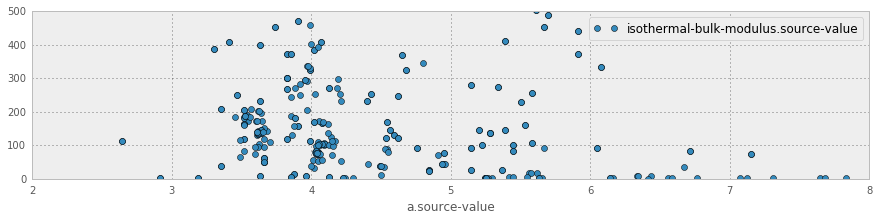

In [94]:
res.plot(x = 'a.source-value', y = 'isothermal-bulk-modulus.source-value', xlim = (2, 8), ylim = (0, 500), style = 'o')